## Om Rawal

In [2]:
import cv2
import pandas as pd 
import numpy as np

In [8]:
img = cv2.imread("./Assets/why-carrots-are-different-colors.jpg")

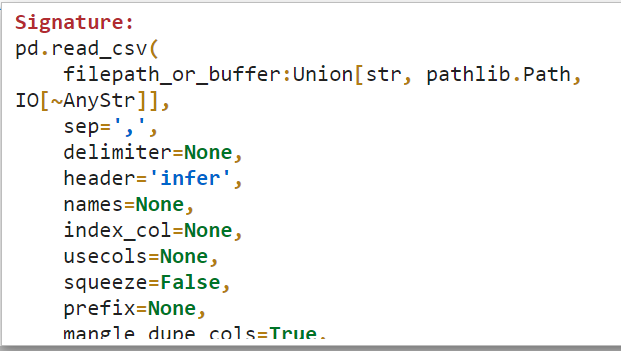

In [4]:
col_names=['color', 'color_name', 'hex', 'R', 'G', 'B'] # specifying the column names for the color CSV file
df=pd.read_csv('./Assets/colors.csv',header=None,names=col_names)
df.head(2)

,color,color_name,hex,R,G,B
0,air_force_blue_raf,Air Force Blue (Raf),#5d8aa8,93,138,168
1,air_force_blue_usaf,Air Force Blue (Usaf),#00308f,0,48,143


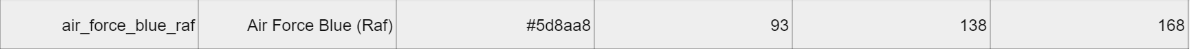

In [14]:
r = g = b = xpos = ypos = 0  # initialization
def getRGBvalue(event, x, y, flags, param):
    global b, g, r, xpos, ypos
    xpos = x
    ypos = y
    b,g,r = img[y,x] # image is read in BGR instead of RGB by default in OpenCV
    b = int(b)  # Converting numpy Int to primitive data type Int
    g = int(g)
    r = int(r)
    
def colorname(B,G,R):
    leastVal = 10000
    for i in range(len(df)): # finding color with minimum deviation from the values in CSV file
        d = abs(B-int(df.loc[i,"B"])) + abs(G-int(df.loc[i,"G"])) + abs(R-int(df.loc[i,"R"]))
        if (d<=leastVal):
            leastVal = d
            cname = df.loc[i,"color_name"] + "Hex" + df.loc[i, "hex"]
    return cname

cv2.namedWindow("Image") # to denote that there will be callback events
cv2.setMouseCallback("Image",getRGBvalue) # calling the function at callback of mouswe movement
            
while True:
    cv2.imshow("Image", img)
    cv2.rectangle(img, (20,20), (img.shape[1] - 40, 60),color=(b,g,r),thickness= -1) # filled rect
    text = colorname(b,g,r) + '   R=' + str(r) + ' G=' + str(g) + ' B=' + str(b)
    cv2.putText(img,text, (50,50),fontFace=2, fontScale=0.8, color=(255,255,255),thickness=2, lineType=cv2.FONT_HERSHEY_SIMPLEX)    
    if(r+g+b >= 600):
        cv2.putText(img,text,(50,50), 2, 0.8, (0,0,0),2,cv2.FONT_HERSHEY_SIMPLEX)   
    key=cv2.waitKey(20)
    if key & 0xFF == 27:
        break
    if(key==ord('p')):
        print('rgb = {}'.format(str(r)+','+str(g)+','+str(b)))
    
cv2.destroyAllWindows()

rgb=5,17,3
rgb=43,33,57
rgb=251,200,55
rgb=249,147,2
rgb=235,252,174
